# Parameter Inference in Astronomy

- Objective: initiate knowledge about parameter inference
- Aimed audience: undergraduate students in STEM
- Prequisite knowledge: high-school level mathematics

Below we load some handy libraries for our tutorial and configure a bit to make plots prettier.

In [1]:
## Import packages
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Matplotlib settings
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 16
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['figure.figsize'] = (8, 8)

## 1. Coin throwing: a toy model in 1-D discrete case

### Description

Let's start with throwing some coins. 
Say that we have 2 coins A and B. 
For both of them, the results can only be "head" or "tail". 
However, A's head cannot be distinguished from B's head, in the same way that A's tail looks identical to B's tail. 
In addition, these coins are not fair:
- Coin A shows head with a probability of `t`, tail with `1-t`;
- Coin B shows tail with a probability of `t`, head with `1-t`,

where `t` is a value to be determined.

### Notation

Let `x = 0` (tail) or `1` (head) be a variable describing possible results. 
We will set `t = 0.95` at the beginning.

### 1.1 Probability mass function

Please run the block below once. 
You will see the probability mass function (pmf) for Coin A. 
The probability is 0.95 for `x = 1` and 0.05 for `x = 0`. 
It makes sense! 
Now, can you imitate it and draw the pmf for Coin B? 
Remember to use a different symbol and color! 

**TODO: Draw the pmf for Coin B**

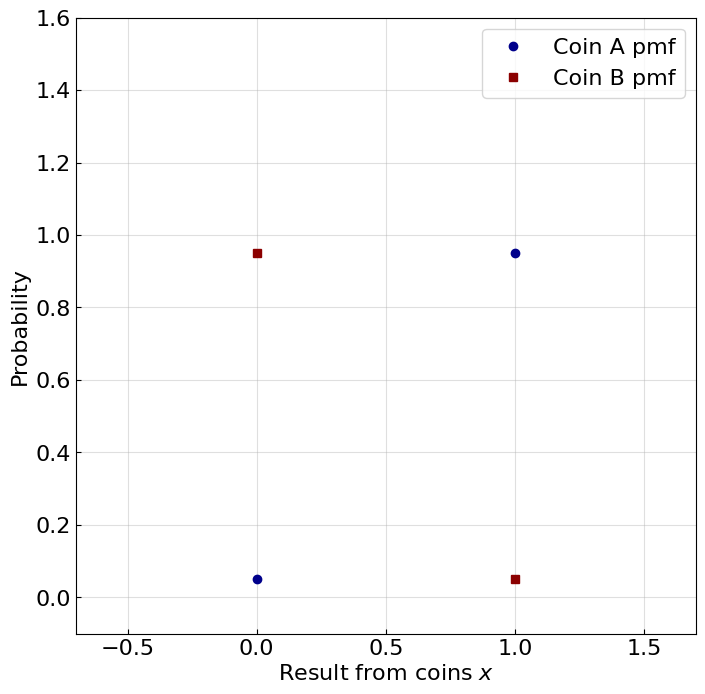

In [2]:
## Define t
t = 0.95

## Define t for Coin A
t_A = t

## List out possible x
x_arr = [0, 1]

## Calculate pmf for all possible x
pmf_A = [stats.bernoulli.pmf(x, p=t_A) for x in x_arr]

## Plot them
plt.plot(x_arr, pmf_A, 'o', color='darkblue', label='Coin A pmf')

## TODO: Add your code here for Coin B

## Define t for Coin B
t_B = 1 - t

## Calculate pmf for all possible x
pmf_B = [stats.bernoulli.pmf(x, p=t_B) for x in x_arr]

## Plot
plt.plot(x_arr, pmf_B, 's', color='darkred', label='Coin B pmf')

## End of TODO

## Adjust axes and labels
plt.xlim(-0.7, 1.7)
plt.ylim(-0.1, 1.6)
plt.legend()
plt.xlabel('Result from coins $x$')
plt.ylabel('Probability');

### 1.2 Sampling simulation

Can we simulate results from coin-throwing with Python? 
Of course! I will show you how to do so for Coin A and let you complete for Coin B. 

**TODO:**
- **Create 250 samples from throwing Coin B**  
- **Print out the number of heads and tails**
- **Rerun it several times**

In [3]:
## Define N = 250
N = 250

## N samples following Coin A's pmf
samples_A = np.random.binomial(1, t_A, size=N)

## TODO: Add your code here for Coin B

## N samples following Coin B's pmf
samples_B = np.random.binomial(1, t_B, size=N)

## End of TODO

## TODO: Add your code here for printing

## Print
print('Number of heads = %d' % samples_B.sum())
print('Number of tails = %d' % (N-samples_B.sum()))

## End of TODO

Number of heads = 13
Number of tails = 237


### 1.3 Reconstruct pmf from sampling 

Let's verify the theoretical pmf with simulations. 
To do this, we will reconstruct the pmf by making a histogram from samples. 
I will plot the theoretical and reconstructed pmf for Coin A. 
Please complete it for Coin B.

**TODO: Draw theoretical and reconstructed pmf for Coin B**

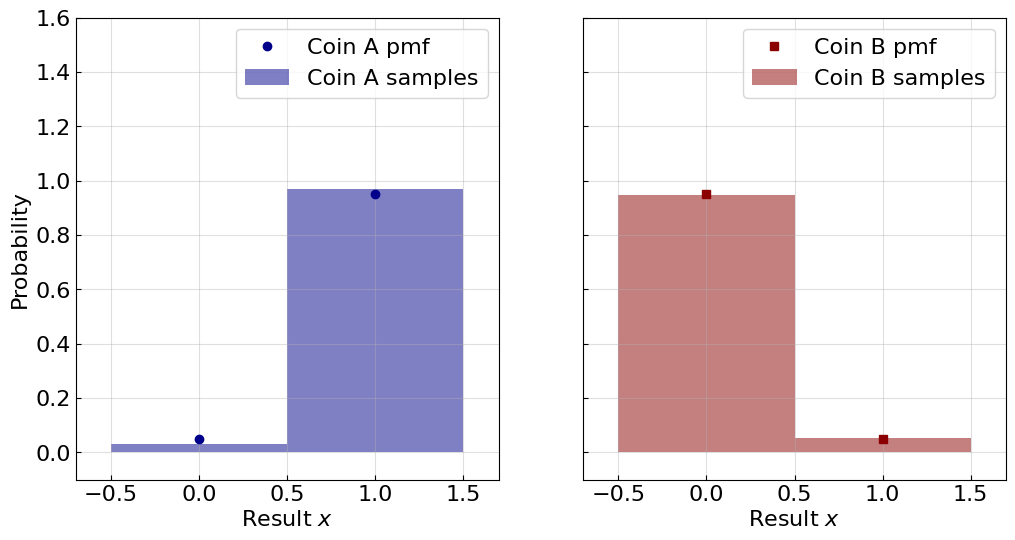

In [4]:
## We will use two panels in this figure. 
## Let's focus first one the first one.
fig = plt.figure(figsize=(12, 6))
fig.add_subplot(1, 2, 1)

## We define the bins as [-0.5, 0.5, 1.5], such that 0 is counted in the left bin and 1 in the right one.
bins = [-0.5, 0.5, 1.5]

## This line is copied from above, to replot pmf.
plt.plot(x_arr, pmf_A, 'o', color='darkblue', label='Coin A pmf')

## This plots the normalized histogram.
plt.hist(samples_A, bins, density=True, color='darkblue', label='Coin A samples', alpha=0.5)

## Adjust axes and labels
plt.xlim(-0.7, 1.7)
plt.ylim(-0.1, 1.6)
plt.legend()
plt.xlabel('Result $x$')
plt.ylabel('Probability')

## Now we focus on the second panel
fig.add_subplot(1, 2, 2)

## TODO: Add your code here for Coin B

plt.plot(x_arr, pmf_B, 's', color='darkred', label='Coin B pmf')
plt.hist(samples_B, bins, density=True, color='darkred', label='Coin B samples', alpha=0.5)

## End of TODO

## Adjust axes and labels
plt.xlim(-0.7, 1.7)
plt.ylim(-0.1, 1.6)
plt.legend()
plt.xlabel('Result $x$')
plt.gca().set_yticklabels([]);

Try to rerun Questions 1.2 and 1.3 several times. 
Does the figure change? Why? 
Change `N` into `10000` and do it again.

### 1.4 Picking a coin before throwing

The story becomes more complicated now. 
Let's put both coins in the same bag and define an _action_ as the following:
- randomly take one coin out of the bag;
- while without knowing which one it is, throw it once;
- record the result (head or tail); and
- put the coin back to the bag.

By intuition, what is the probability to get a head from an action?

We want to verify it. 
Using codes above, can you write a new code which yield the result from an action?

**TODO: Create a "sampler" for actions as a function which returns (result, coin)**

In [5]:
def sampler_for_actions():
    ## This should return (0, 'A') or (1, 'A') or (0, 'B') or (1, 'B')
    ## with proper probabilities.
    
    ## TODO: Add your code here for actions
    
    ## Equal chance to have Coin A or Coin B
    t_coin = 0.5
    
    ## Get a coin
    coin = np.random.binomial(1, t_coin, size=1)
    
    ## Depending on the coin, generate a result
    if coin == 1:
        coin_name = 'A'
        result = np.random.binomial(1, t_A, size=1)[0]
    else:
        coin_name = 'B'
        result = np.random.binomial(1, t_B, size=1)[0]
    
    ## Return both result and coin name
    return (result, coin_name)
    
    ## End of TODO

### 1.5 Sampling from the sampler

We want to do a similar exercise as in Questions 1.2 and 1.3. 

**TODO**:
- **Creates 1000 samples from the sampler**
- **Print out the number of heads**
- **Draw the theoretical and reconstructed pmf**

Number of heads = 533


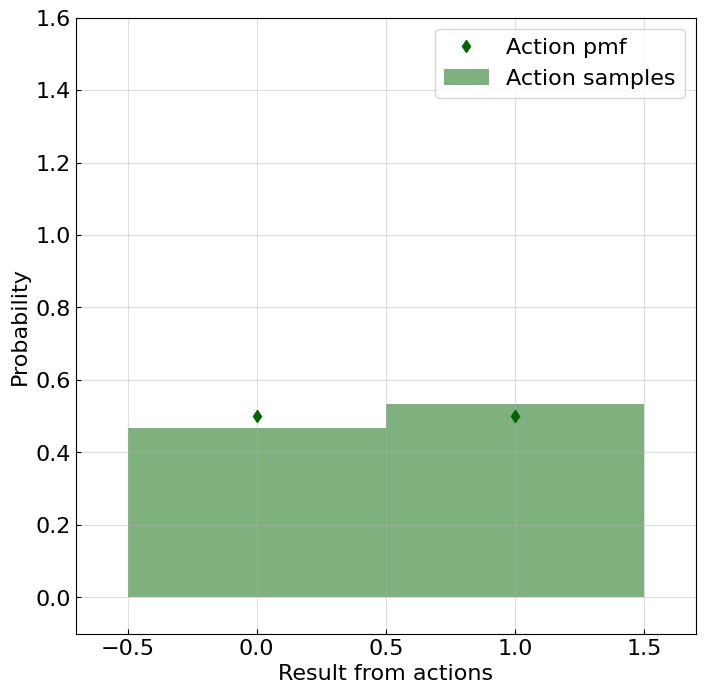

In [6]:
## Define N = 1000
N = 1000

## TODO: Add your code here for 1000 samples

## Create an empty list
samples_action = []

## Create samples
for i in range(N):
    samples_action.append(sampler_for_actions())

## End of TODO

## TODO: Add your code here for the number of heads

## Isolate the head/tail result part
results_action = [sample[0] for sample in samples_action]

## Print the number of heads
print('Number of heads = %d' % sum(results_action))

## End of TODO

## TODO: Add your code here for the pmf

## Combine the 2 theoretical pmf together
pmf_action = [0.5*P_0+0.5*P_1 for P_0, P_1 in zip(pmf_A, pmf_B)]

## Plot action's pmf
plt.plot(x_arr, pmf_action, 'd', color='darkgreen', label='Action pmf')

## This plots the normalized histogram.
plt.hist(results_action, bins, density=True, color='darkgreen', label='Action samples', alpha=0.5)

## End of TODO

## Adjust axes and labels
plt.xlim(-0.7, 1.7)
plt.ylim(-0.1, 1.6)
plt.legend()
plt.xlabel('Result from actions')
plt.ylabel('Probability');

### Observation

While you are enjoying this tutorial, your 7-year-old niece and her mom come in. 
Your niece grabs the bag, takes out a coin, throws it, and says:
> Look! It's a head!

At this very moment, your aunt says:
> I saw that there were two coins in the bag. 
> Could you tell me which one my daughter was throwing?

Coin A or Coin B, she means. 
In the following, we will note `x_obs = 1` (head) as the observed value. 
The goal is to answer to your aunt's question based one and only one observation from your niece.

### 1.6 Conditional probability

The probability under a given condition is called conditional probability. 
Do you know what is the conditional probability 
for which the coin that your niece threw was A (or B)? 
What's the theoretical value? 
What about the reconstructed value from samples?

**TODO:**
- **Calculate the theoretical conditional probability of the coin being A given `x_obs = 1`**
- **Calculate the reconstructed value using samples obtained in Question 1.5**

In [7]:
## TODO: Add your code here for theoretical conditional probability

## This is P(1|A), the proba of getting x=1 from Coin A.
P_1A = pmf_A[1]

## This is P(1|B), the proba of getting x=1 from Coin B.
P_1B = pmf_B[1]

## P(A|1) = P(A & 1) / (P(A & 1) + P(B & 1))
##        = P(A)*P(1|A) / (P(A)*P(1|A) + P(B)*P(1|B))
## P(A) and P(B) are both 0.5.
P_A1 = 0.5*P_1A / (0.5*P_1A + 0.5*P_1B)

## Print
print('Head observed, the theoretical probability of the coin being A = %f' % P_A1)

## End of TODO

## TODO: Add your code here for reconstructed conditional probability

## Get all samples whose result is 1
coin_list_1 = [sample[1] for sample in samples_action if sample[0] == 1]

## Total number of selected samples
N_1 = len(coin_list_1)

## Number of A in selection
coin_list_A1 = list(filter(lambda c: c == 'A', coin_list_1))
N_A1 = len(coin_list_A1)

## Print out
print('Head observed, the reconstructed probability of the coin being A = %f' % (N_A1/N_1))

## End of TODO

Head observed, the theoretical probability of the coin being A = 0.950000
Head observed, the reconstructed probability of the coin being A = 0.954972


Can you answer to your aunt's question easily? 
How confident are you?

Try this: take `t = 0.52` and rerun the analysis. 
How will you answer to your aunt's question now?

### 1.7 Unequal weights between A and B

Let's set `t = 0.52`. 
Now we consider the case where we don't have 2 coins anymore but 3. 
One coin is like Coin A. 
The others are like Coin B, undistinguishable. 
Please copy the code to the block below and modify it to get the probability of the coin being A when the head is observed.

**TODO:**
- **Calculate the theoretical conditional probability of the coin being A given `x_obs = 1` in the new setting**
- **Create a new sampler for the new setting as in Question 1.4**
- **Calculate the reconstructed conditional probability of the coin being A given `x_obs = 1` with the new sampler**

In [8]:
## Redefine t
t = 0.52
t_A = t
t_B = 1 - t

## Redefine P(1|A) and P(1|B) with new t
P_1A = stats.bernoulli.pmf(1, p=t_A)
P_1B = stats.bernoulli.pmf(1, p=t_B)

## TODO: Add your code here for the new theory value

## P(A|1) = P(A & 1) / (P(A & 1) + P(B & 1))
##        = P(A)*P(1|A) / (P(A)*P(1|A) + P(B)*P(1|B))
## Now P(A) = 1/3, P(B) = 2/3.
P_A1 = 1/3*P_1A / (1/3*P_1A + 2/3*P_1B)

## Print
print('Head observed, the theoretical probability of the coin being A = %f' % P_A1)

## End of TODO

def sampler_for_new_actions():
    ## TODO: Add your code here for the new sampler
    
    t_coin = 1/3
    coin = np.random.binomial(1, t_coin, size=1)
    if coin == 1:
        coin_name = 'A'
        result = np.random.binomial(1, t_A, size=1)[0]
    else:
        coin_name = 'B'
        result = np.random.binomial(1, t_B, size=1)[0]
    return (result, coin_name)
    
    ## End of TODO
    
## TODO: Add your code here for the new reconstructed value

## Create an empty list
samples_action = []

## Create samples
for i in range(N):
    samples_action.append(sampler_for_new_actions())

## Get all samples whose result is 1
coin_list_1 = [sample[1] for sample in samples_action if sample[0] == 1]

## Total number of selected samples
N_1 = len(coin_list_1)

## Number of A in selection
coin_list_A1 = list(filter(lambda c: c == 'A', coin_list_1))
N_A1 = len(coin_list_A1)

## Print out
print('Head observed, the reconstructed probability of the coin being A = %f' % (N_A1/N_1))

## End of TODO

Head observed, the theoretical probability of the coin being A = 0.351351
Head observed, the reconstructed probability of the coin being A = 0.360396


Let's summarize all these more properly. Please run the following block to see the illustration.

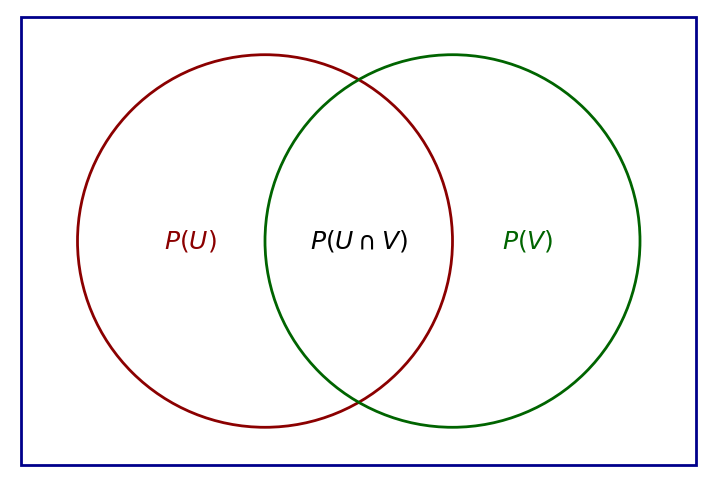

In [9]:
import matplotlib.patches as pat
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
ax.add_artist(pat.Rectangle((-0.9, -0.6), 1.8, 1.2, fc='none', ec='darkblue', lw=2))
ax.add_artist(pat.Circle((-0.25, 0), 0.5, fc='none', ec='darkred', lw=2))
ax.add_artist(pat.Circle((0.25, 0), 0.5, fc='none', ec='darkgreen', lw=2))
ax.annotate('$P(U)$', xy=(-0.45, 0), color='darkred', va='center', ha='center', size=18)
ax.annotate('$P(V)$', xy=(0.45, 0), color='darkgreen', va='center', ha='center', size=18)
ax.annotate('$P(U\cap V)$', xy=(0, 0), color='k', va='center', ha='center', size=18)
plt.xlim(-0.93, 0.93)
plt.ylim(-0.62, 0.62)
ax.set_axis_off()

### Bayes' theorem

Let $U$, $V$ be two events which can happen or not. 
The conditional probability of $V$ given that $U$ has already happened is

$$P(V|U) \equiv \frac{P(U\cap V)}{P(U)}.$$

So we can write

$$P(V|U)P(U) = P(U\cap V) = P(U|V)P(V)\ \ \ \ \text{(Bayes' theorem).}$$

Following the example of Section 1, say that $U$ is the event `x = 1`, $V$ the event `coin = A`. 
Then we can write

$$P(\mathrm{coin}=\mathrm{A}|x=1)P(x=1) = P(x=1|\mathrm{coin}=\mathrm{A})P(\mathrm{coin}=\mathrm{A}).$$

In the case where we indeed observe `x = 1`, $P(x=1)$ becomes a certainty. 
So $P(x=1)=1$. 
Thats means, we can write under a simplified format:

$$P(\mathrm{A}|1) = P(1|\mathrm{A})P(\mathrm{A}).$$

### Interpretation

What do different terms mean? Well, the interpretation is the following:
- $P(\mathrm{A})$: the initial guess of A's probability,
- $P(1|\mathrm{A})$: how probable A yields 1,
- $P(\mathrm{A}|1)$: the adjusted A's probability given the knowledge of `x = 1`.

In Question 1.7, the initial guess is $P(\mathrm{A})=1/3$, $P(\mathrm{B})=2/3$. 
Since A and B don't yield 1 with the same probability, A's probability is then adjusted, and become $P(\mathrm{A}|1)\neq 1/3$.

Let's leave our coin-throwing example and consider the general case.
If we consider `x` as data in general, `coin` as parameters in general, then the above equation can be written as:

$$P(\mathrm{parameter}|\mathrm{data}) = P(\mathrm{data}|\mathrm{parameter})P(\mathrm{parameter}).$$

More formally, the names of the different terms are:
- $P(\mathrm{parameter})$: the _prior_, initial guess,
- $P(\mathrm{data}|\mathrm{parameter})$: the _model_, distribution of data under a given parameter,
- $P(\mathrm{parameter}|\mathrm{data})$: the _posterior_, adjusted distribution of parameter given data.

### Likelihood

Note that the model is a distribution of **data**, while the prior and posterior are of **parameter**. 
They are fundamentally different things. 
However, once data are observed, they are fixed and $P(\mathrm{data}|\mathrm{parameter})$ becomes _de facto_ a function of parameter. 
Thus, we define a new quantity called the _likelihood_ as:

$$\mathcal{L}(\mathrm{parameter}|\mathrm{data}) \equiv P(\mathrm{data}|\mathrm{parameter}).$$

In this way, the above equation can be considered fully as a relation in the parameter space:

$$P(\mathrm{parameter}|\mathrm{data}) = \mathcal{L}(\mathrm{parameter}|\mathrm{data})P(\mathrm{parameter}).$$

So the interpretation is very simple now. 
The prior knowledge can be adjusted by the likelihood (data provided) and yields the posterior knowledge.
Let's move on to the next section to get more familiar with this notion.